## Метрики качества классификации

Продолжим изучать бинарную классификацию.

В этом уроке мы поговорим про оценку качкства уже обученой модели.

Пусть все также есть два класса: 0 и 1, истинные метки $y\_true \in$ {0,1} и $y\_pred \in$ {0,1}

В предыдущих уроках мы мерили ошибку классификации, как *долю неправильных ответов*.

Чаще при оценке качества классификации смотрят наоборот: *долю правильных ответов* - **accuracy**

\begin{equation*}
accuracy = \dfrac{1}{N}\sum_{i=1}^N[\tilde y_i = y_i]
\end{equation*}

\begin{cases}
[True] = 1, \\
[False] = 0.
\end{cases}

* $y_i$ - истинная метка на $i$-ом объекте
* $\tilde y_i$ - предсказанная метка на $i$-ом объекте

По результатам классификации полезно составить следующую таблицу:

| predict/true  | y_true = 1         |y_true=0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | True Positive (TP)|False Positive (FP)|
| **y_pred = 0**  | False Negative (FN)|True Negative (TN)|

* True Positive (TP) - кол-во верно предсказанных объектов 1-го класса
* False Positive (FP) -  кол-во НЕверно предсказанных объектов 1-го класса
* True Negative (TN) - кол-во верно предсказанных объектов 0-го класса
* False Negative (FN) - кол-во НЕверно предсказанных объектов 0-го класса

Тогда метрику *accuracy* можно выразить, как:
\begin{equation*}
accuracy = \dfrac{TP + TN}{TP+TN+FN+FP}
\end{equation*}

Рассмотрим следующий пример:

Возьмем модель машинного обучения $f(x)$, обучим ее и получим следующие результаты на валидации:

| predict/true  | y_true = 1          |y_true = 0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | 15 |18  |
| **y_pred = 0**  | 80   |1000  |

\begin{equation*}
accuracy = \dfrac{15 + 1000}{15+1000+80+18} \approx 0.912
\end{equation*}

Точность выше 90%, кажется что неплохо.

Возьмем другую, совершенно простую модель машинного обучения $a(x)$, которая каждому объекту $x$ ставит метку $0$:

* $a(x) = 0$ для $\forall x \in X$

| predict/true  | y_true = 1          |y_true = 0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | 0 |0  |
| **y_pred = 0**  | 95   |1018  |

Такая модель конечно же никуда не годиттся, но давайте посмотрим долю правильных ответов:
\begin{equation*}
accuracy = \dfrac{0 + 1018}{0+1018+95+0} \approx 0.915
\end{equation*}

Что мы имеем:
* Константный классификатор выдал точность классификации даже лучше, чем обученая модель!

* Оказалось выгоднее всем объектам ставить метку $0$, чем использовать обученый классификатор $f(x)$.

* Это случилось потомучто объектов нулевого класса оказалось гораздо больше, чем объектов первого класса.

* Выборка в которой объектов одного класса гораздо больше, чем объектов других классов, называется **несбалансированной**.

* $Accuracy$ на несблансированных выборках полезно сравнивать с $accuracy$ полученной при ответах константного классификатора.

На практике очень часто встречаются несбалансированные выборки, поэтому полезно смотреть на саму таблицу ошибок.

Такую таблицу можно строить и для большего числа классов, ее еще называют **confusion matrix**.

| predict/true  | y_true = 1         |y_true=0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | True Positive (TP)|False Positive (FP)|
| **y_pred = 0**  | False Negative (FN)|True Negative (TN)|

Чаще всего помиомо $accuracy$ смотрят метрики устойчивые к *дисбалансу классов*:

\begin{equation*}
precision = \dfrac{TP}{TP+FP} \\
recall = \dfrac{TP}{TP+FN}
\end{equation*}

* $precisin$ (*точность*) $-$ доля правильно классифицированных объектов 1-го класса среди всех кого модель отнесла к 1-му классу.
* $recall$ (*полнота*) $-$ доля найденных объектов 1-го класса среди всех объектов первого класса.


Давайте посмотрим на $precisin$ и $recall$ для нашего примера

| predict/true  | y_true = 1          |y_true = 0    |
| ------------- |:------------------| -----------:|
| **y_pred = 1**  | 15 |18  |
| **y_pred = 0**  | 80   |1000  |


\begin{equation*}
precision = \dfrac{15}{15+18} \approx 0.45 \\
recall = \dfrac{15}{15+80} \approx 0.158 \\
accuracy = \dfrac{15 + 1000}{15+1000+80+18} \approx 0.912 \\
\end{equation*}

Хоть доля правильных ответов $accuracy$ и выше $90\%$, $precision$ и $recall$ оказались очеень низкими, обе метрики ниже $50\%$, это очень плохо.

По таким метрикам видно, что $f(x)$ не самый лучший классификатор.

Мы находим всего $15 \%$ объектов первого класса ($recall = 0.158$), при этом почти в половине случае ошибаемся ($precision = 0.45$).


Если классифкатор $f(x)$ выдает вероятности принадлежности к классу, то подбирая разные пороги $p_0$, мы можем отдавать предпочтения либо *точности (precision)* либо *полноте (recall)*

* Действительно, чем ниже порог $p_0$, тем чаще классификатор будет относить объект к 1-му классу. Увеличится $recall$, но и тогда станет больше ложно положительных срабатываний (False Positive), $precision$ упадет.
* И наоборот, увеличивая порог $p_0$, мы будем реже относить объекты к первому классу, будем более внимательны, False Positive станет меньше , $precision$ увеличится. Но тогда и истинных объектов 1-го класса мы станем находить меньше, $recall$ упадет

Иногда бывает не очень удобно смотреть сразу на 2 метрики $precision$ и $recall$, удобнее смотреть на одну.

В этом случае мы могли бы взять среднее значение, но тогда становятся неразличимы следующие ситации:

**Ex1:**
\begin{equation*}
precision = 0.95 \\
recall = 0.15 \\
среднее = 0.55
\end{equation*}
**Ex2:**
\begin{equation*}
precision = 0.55 \\
recall = 0.55 \\
среднее = 0.55
\end{equation*}

Совершенно разные ситуации, а среднее одинаковое.

Чтобы такого избежать, вместо среднего используют среднее гармоническое (**F-меру**):

\begin{equation*}
F = \dfrac{2 \cdot precision \cdot recall}{precision + recall}
\end{equation*}

**Ex1:**
\begin{equation*}
precision = 0.95 \\
recall = 0.15 \\
F = \dfrac{2 \cdot 0.95 \cdot 0.15}{0.95 + 0.15} \approx 0.26
\end{equation*}
**Ex2:**
\begin{equation*}
precision = 0.55 \\
recall = 0.55 \\
F = \dfrac{2 \cdot 0.55 \cdot 0.55}{0.55 + 0.55} = 0.55
\end{equation*}

**F-меру** еще можно понимать, как сглаженный минимум - 

*F-мера* близка к нулю, когда близка к нулю хотябы одна из двух метрик (*precision* или *recall*).


Все перечисленные метрики классификации требуют предсказаний в виде метки класса.

Значит для оценки качества предсказаний каждый раз необходимо подбирать пороги, что не всегда бывает удобно.

Хотелось бы уметь оценивать качество классификации по самим вероятностям.

Рассмотрим двумерную плоскость. 

* по оси абсцисс будем откладывать долю неверно принятых объектов (False Positive Rate, FPR),

* по оси ординат - долю  верно принятых объектов (True Positive Rate, TPR, он же *recall*)

\begin{equation*}
FPR = \dfrac{FP}{FP+TN} \\
TPR = \dfrac{TP}{TP+FN}
\end{equation*}

Каждый выбор порога $p_0$ (всего их $N+1$, $N$-количество объектов в выборке) будет соотвествовать точке на такой плоскости с осями *FPR* и *TPR*, тогда меняя порог $p_0$ мы можем построить кривую, которая всегда будет выходить из точки (0,0) и приходить  в точку (1,1). А численной мерой качества будет площадь под такой кривой.

* Кривая построенная таким образом называется **ROC криваой**
* Площадь под *ROC криваой* называют **AUC ROC**

Разберем процедуру построения *ROC криваой* на конкретном примере.

Пусть наш алгоритм машинного обучения $f(x)$ выдал оценки вероятностей первого класса. Также у нас есть исстинные метки класса.


|y_pred| y_true|
|------| -----:|
|0.3 |1|        
|0.1 |0|
|0 |0|
|0.2 |1|
|0.2 |0|
|0.5 |0|
|0.7 |1|

Отсортируем таблицу по оценкам алгоритма $f(x)$


|y_pred| y_true|
|------| -----:|
|0.7 |1|
|0.5 |0|
|0.3 |1|   
|0.2 |1|
|0.2 |0|
|0.1 |0|
|0 |0|

* Пусть $k_0$ - число объектов истинного класса 0, $k_0$=4
* $k_1$ - число объектов истинного класса 1, $k_1$ = 3

1. Разобьем единичный квадрат на $k_0$ вертикальных и $k_1$ горизонтальных линий.
2. Стартуем из точки $(0,0)$, 
3. Идем по отсортированной таблице сверху вниз. 
   * Если **y_true == 1**, то делаем шаг вверх
   * Если **y_true == 0**, то делаем шаг влево
4. Идем вниз по таблице пока не дойдем до конца
5. В итоге должны оказаться в точке (1,1) так как сделали $k_0+k_1$ шагов

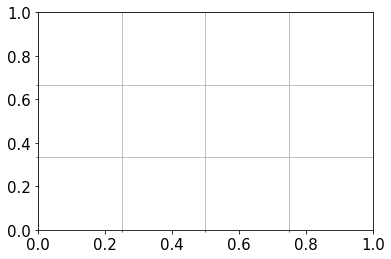

In [132]:
def plot_roc():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    x_minor_ticks = np.linspace(0, 1, 5)
    y_minor_ticks = np.linspace(0, 1, 4)
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_minor_ticks, minor=True)
    ax.grid(which='minor', alpha=1)
plot_roc()